# Projects in data science: Images

Help for some exercises can be found in the notebook seen during class: https://colab.research.google.com/drive/10p3hoY3mTWSXeIdbjPNMIbwilLbiSN90

## From array to grayscale image


**Exercises**:
1. Use *numpy* (for example, [the repeat function](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html)) to create a 5x5 pixel array with 0s and 1s. You can try to create a pattern such as stripes or checkboard
2. Set the middle pixel to 0.5
3. In another variable, store the mutliplication of your image by 255. Check that the dimensions of both images are the same
4. Display both images with [*matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). What do you see ? What do you need to do, to make the images appear black and white?


Text(0.5, 1.0, 'Multiplied image')

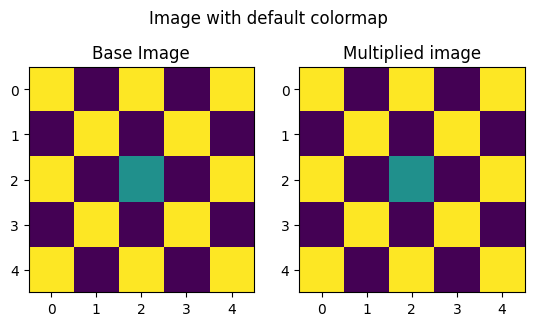

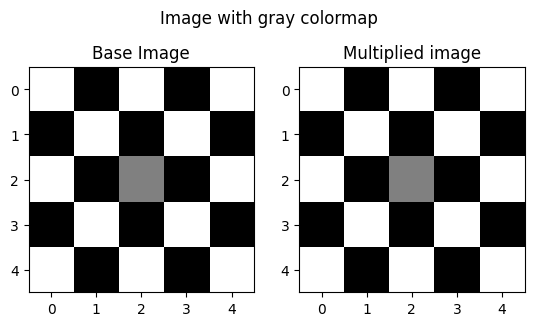

In [1]:
#Your answer
import numpy as np
import matplotlib.pyplot as plt

#1. and 2.
base_img = np.array([
    [1,0,1,0,1],
    [0,1,0,1,0],
    [1,0,0.5,0,1],
    [0,1,0,1,0],
    [1,0,1,0,1],
])

#3.
multiplied_img = base_img * 255

#4.
fig = plt.figure()
fig.suptitle("Image with default colormap",y=0.85)
ax = fig.add_subplot(121)
ax.imshow(base_img)
ax.set_title("Base Image")
ax = fig.add_subplot(122)
ax.imshow(multiplied_img)
ax.set_title("Multiplied image")

fig = plt.figure()
fig.suptitle("Image with gray colormap",y=0.85)
ax = fig.add_subplot(121)
ax.imshow(base_img,cmap="gray")
ax.set_title("Base Image")
ax = fig.add_subplot(122)
ax.imshow(multiplied_img,cmap="gray")
ax.set_title("Multiplied image")

**Your comments:**

## Color image

**Exercises:**
1. Now try to create a 5x5 color checkerboard with random colors. This can be done in 1 line with [the randint function from numpy.random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html). Display the image.
2. If you run this code multiple time, the image will change. For the image to stay the same, you need to define [the random seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)
3. Compare how you would describe the colors, to the RGB values of the pixels. Are you able to define what kind of values would translate into for example red, brown, or yellow?
4. Display the R,G,B channels as images separately. Do the individual values
tell you enough about the colors of the pixels?

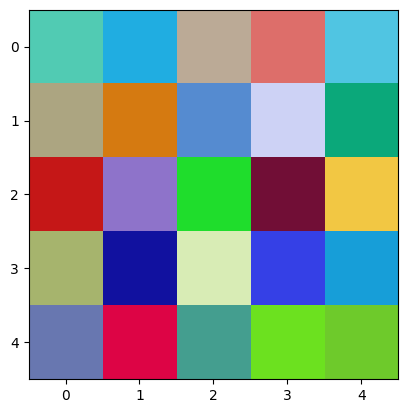

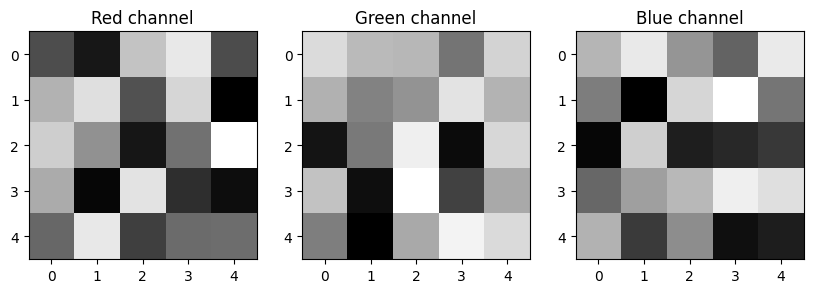

In [2]:
#Your answer
#2.
np.random.seed(1907)

#1.
color_img = np.random.randint(0,255,(5,5,3))
plt.figure()
plt.imshow(color_img)
plt.show()

#4.
channels = ["Red","Green","Blue"]
fig = plt.figure(figsize=(10,10))
for i,color in enumerate(channels):
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(color_img[:,:,i],cmap="gray")
    ax.set_title(f"{color} channel")


**Your comments**:

## Resizing an image

**Exercises**:
1. Load a color image using [*scikit image*](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread), it can be an image from the dataset, from the exemple_data folder or a photo of your choice that’s at least 500x500 pixels. Store the original size in pixels, and the original [size in bytes](https://docs.python.org/3/library/sys.html#sys.getsizeof), in different variables.
2. Explore the documentation for [skimage.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html). Try to resize the image to 20% of its size in each dimension, and save the image as a different file. Record the new size in bytes, how much does it change?
3. Explore the documentation for [skimage.util](https://scikit-image.org/docs/stable/api/skimage.util.html) which has several functions for converting the image to different formats. Can you decrease the image size in bytes, without changing the image size in pixels? How does this affect the image quality?

Size of original image in pixel:(667, 1000, 3)
Size of original image in bytes:2001144

Size of resized image in pixel:(133, 200, 3)
Size of resized image in bytes:638544

Size of float32 image in pixel:(667, 1000, 3)
Size of float32 image in bytes:8004144


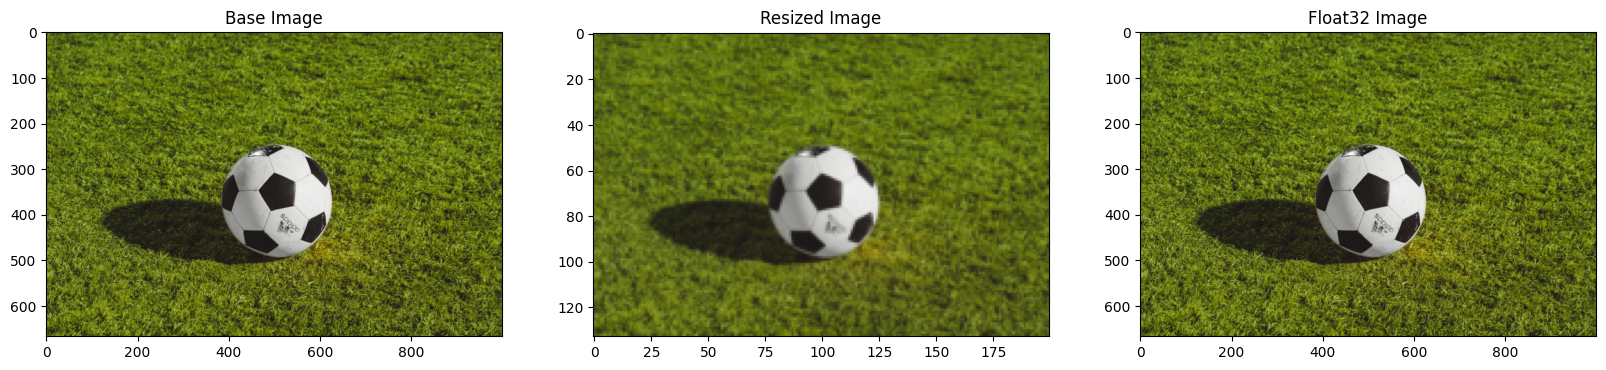

In [3]:
#Your answer
import skimage.io as io
from skimage.transform import resize
from skimage.util import img_as_float32
import sys

#1.
img = io.imread("./example_data/football.jpg")
img_pixel_size = img.shape
img_bytes_size = sys.getsizeof(img)
print(f"Size of original image in pixel:{img_pixel_size}\nSize of original image in bytes:{img_bytes_size}")

#2.
resized_img = resize(img,(img_pixel_size[0]*0.2,img_pixel_size[1]*0.2,3))
resized_img_pixel_size = resized_img.shape
resized_img_bytes_size = sys.getsizeof(resized_img)
print(f"\nSize of resized image in pixel:{resized_img_pixel_size}\nSize of resized image in bytes:{resized_img_bytes_size}")

#3.
img_ubyte = img_as_float32(img)
ubyte_img_pixel_size = img_ubyte.shape
ubyte_img_bytes_size = sys.getsizeof(img_ubyte)
print(f"\nSize of float32 image in pixel:{ubyte_img_pixel_size}\nSize of float32 image in bytes:{ubyte_img_bytes_size}")

#Visualisation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1)
plt.title("Base Image")
plt.imshow(img)

ax = fig.add_subplot(1,3,2)
plt.title("Resized Image")
plt.imshow(resized_img)

ax = fig.add_subplot(1,3,3)
plt.title("Float32 Image")
plt.imshow(img_ubyte)
plt.show()

**Your comments**:

## Cropping image based on the mask

**Exercises**:
1. Load an image and its mask, store these in im and mask
2. Use [the numpy package](https://numpy.org/doc/stable/reference/generated/numpy.where.html) together with mask to find out the minimum/maximum coordinates where the lesion is present.
3. Create padded image, which extracts only the lesion from the image, with a bit of padding on each side

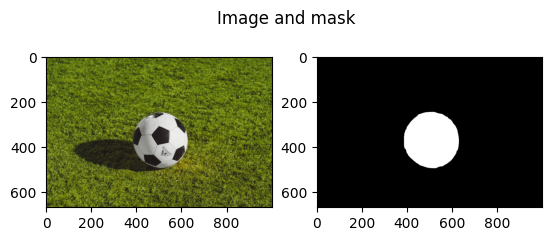

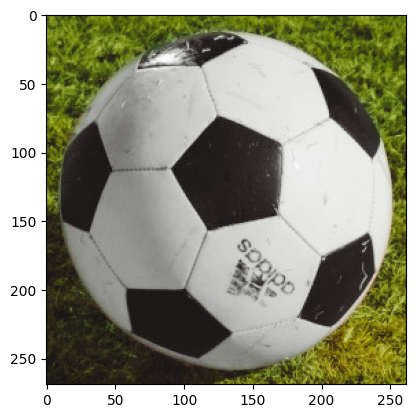

In [4]:
#1.
im = io.imread("./example_data/football.jpg")
mask = io.imread("./example_data/football_mask.png")
fig = plt.figure()
fig.suptitle("Image and mask",y=0.75)
fig.add_subplot(121)
plt.imshow(im)
fig.add_subplot(122)
plt.imshow(mask,cmap="gray")
plt.show()

#2.
object_coords = np.where(mask != 0)
min_x = min(object_coords[0])
max_x = max(object_coords[0])
min_y = min(object_coords[1])
max_y = max(object_coords[1])

cropped_object = im[min_x-10:max_x+10,min_y-10:max_y+10]
plt.figure()
plt.imshow(cropped_object)
plt.show()

## The Dice Score

**Exercises**:
1. Implement the Dice score for 2 binary masks
2. Use numpy to create arrays with different configurations of 0s and 1s.
3. Compare the Dice score obtained for each of these arrays on your ground-truth mask

In [5]:
#Your answer
def dice_score(mask,gt):
    inter = mask.flatten() & gt.flatten()
    union = mask.flatten() | gt.flatten()
    return (2*np.sum(inter))/(np.sum(union)+np.sum(inter))


**Your comments**:

**Exercises**: Look at the Dice scores obtained in the cell below. What can you say about this?

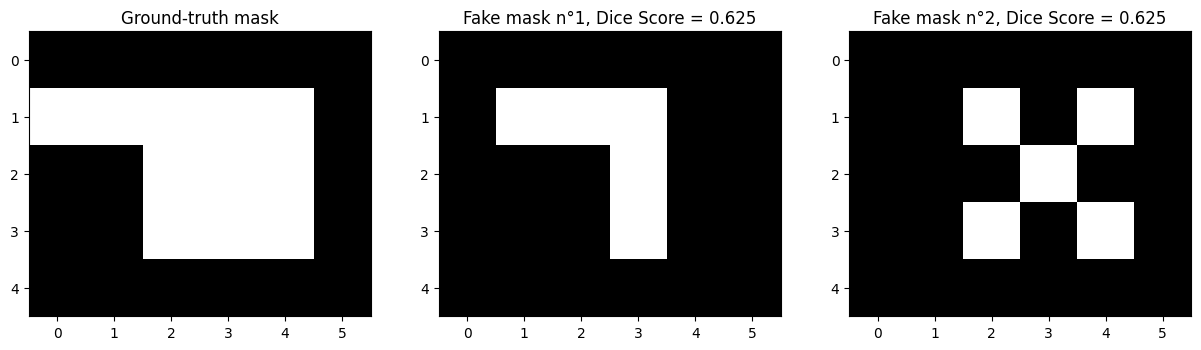

In [6]:
ground_truth_mask = np.array([
    [0,0,0,0,0,0],
    [1,1,1,1,1,0],
    [0,0,1,1,1,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0],
])

fake_mask_1 = np.array([
    [0,0,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0],
])

fake_mask_2 = np.array([
    [0,0,0,0,0,0],
    [0,0,1,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,1,0],
    [0,0,0,0,0,0],
])

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(ground_truth_mask,cmap="gray")
plt.title("Ground-truth mask")
plt.subplot(1,3,2)
plt.imshow(fake_mask_1,cmap="gray")
plt.title(f"Fake mask n°1, Dice Score = {dice_score(ground_truth_mask,fake_mask_1)}")
plt.subplot(1,3,3)
plt.imshow(fake_mask_2,cmap="gray")
plt.title(f"Fake mask n°2, Dice Score = {dice_score(ground_truth_mask,fake_mask_2)}")
plt.show()